In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spx.csv')

In [3]:
df_close = df['close']

In [4]:
close = df['close'].to_numpy()

In [5]:
adf_result = adfuller(close)

In [6]:
print(f'ADF statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF statistic: 1.1647795747723635
p-value: 0.9957332769254442


In [7]:
adf_result2 = adfuller(np.diff(close))
print(f'ADF statistic: {adf_result2[0]}')
print(f'p-value: {adf_result2[1]}')

ADF statistic: -16.68448754250082
p-value: 1.5066212133945178e-29


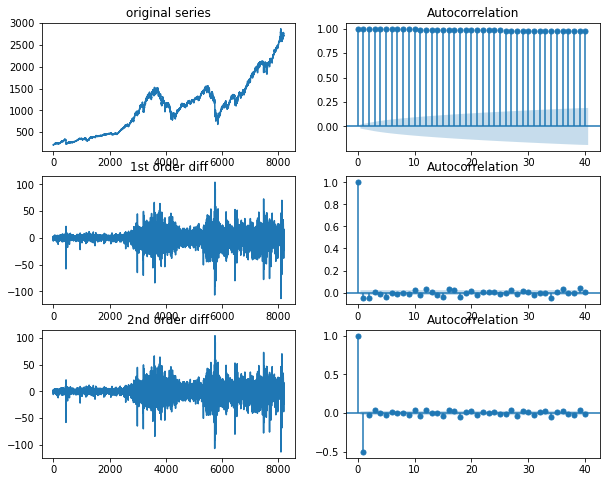

In [8]:
plt.rcParams.update({'figure.figsize':(10,8)})

fig,axes = plt.subplots(3,2, sharex=False)
axes[0,0].plot(df_close)
axes[0,0].set_title('original series')
plot_acf(df_close, ax=axes[0,1])

axes[1,0].plot(df_close.diff())
axes[1,0].set_title('1st order diff')
plot_acf(df_close.diff().dropna(), ax=axes[1,1])


axes[2,0].plot(df_close.diff())
axes[2,0].set_title('2nd order diff')
plot_acf(df_close.diff().diff().dropna(), ax=axes[2,1])
plt.show()

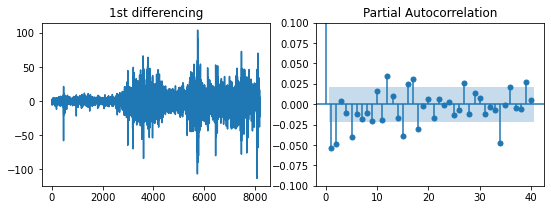

In [9]:
plt.rcParams.update({'figure.figsize':(9,3)})
fig, axes = plt.subplots(1,2)
axes[0].plot(df_close.diff())
axes[0].set_title('1st differencing')
axes[1].set(ylim=(-0.1,0.1))
plot_pacf(df_close.diff().dropna(),ax=axes[1])
plt.show()

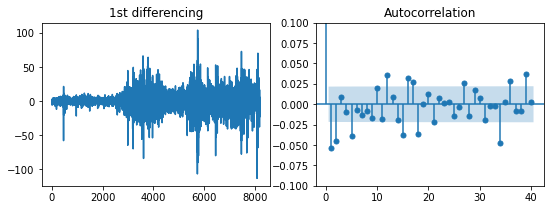

In [10]:
plt.rcParams.update({'figure.figsize':(9,3)})
fig, axes = plt.subplots(1,2)
axes[0].plot(df_close.diff())
axes[0].set_title('1st differencing')
axes[1].set(ylim=(-0.1,0.1))
plot_acf(df_close.diff().dropna(),ax=axes[1])
plt.show()

In [11]:
model = ARIMA(close, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8192
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -32245.791
Date:                Sat, 30 Oct 2021   AIC                          64501.583
Time:                        20:30:57   BIC                          64536.637
Sample:                             0   HQIC                         64513.567
                               - 8192                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2296      0.107     -2.149      0.032      -0.439      -0.020
ar.L2          0.6423      0.074      8.646      0.000       0.497       0.788
ma.L1          0.1741      0.107      1.622      0.1

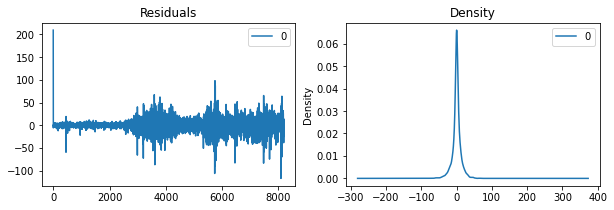

In [12]:
plt.rcParams.update({'figure.figsize':(10,3)})
residuals = pd.DataFrame(model_fit.resid)
fig, axes = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=axes[0])
residuals.plot(kind='kde', title='Density', ax=axes[1])
plt.show()


In [13]:
prediction_arima = model_fit.predict(start=1, end=len(close))

In [19]:
print(model_fit.fittedvalues)

[   0.          209.588319    210.81205061 ... 2724.26799801 2702.24106479
 2716.8068601 ]


(-409.55, 8600.55)

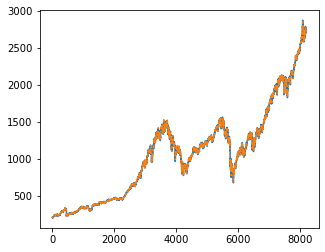

In [14]:
plt.rcParams.update({'figure.figsize':(5,4)})
fig, axes = plt.subplots(1,1)
axes.plot(close)
axes.plot(prediction_arima, ls=':')
axes.set_xlim()

In [15]:
size_train = int(0.8*len(close))

train = close[0:size_train]
test = close[size_train:]

In [16]:
tsvc = TimeSeriesSplit()
for train_idx, val_idx in tsvc.split(train):
    print('TRAIN:', train_idx, 'TEST', val_idx)
    X_train, X_val = train[train_idx], train[val_idx]
    

TRAIN: [   0    1    2 ... 1090 1091 1092] TEST [1093 1094 1095 ... 2182 2183 2184]
TRAIN: [   0    1    2 ... 2182 2183 2184] TEST [2185 2186 2187 ... 3274 3275 3276]
TRAIN: [   0    1    2 ... 3274 3275 3276] TEST [3277 3278 3279 ... 4366 4367 4368]
TRAIN: [   0    1    2 ... 4366 4367 4368] TEST [4369 4370 4371 ... 5458 5459 5460]
TRAIN: [   0    1    2 ... 5458 5459 5460] TEST [5461 5462 5463 ... 6550 6551 6552]


In [17]:
X_train

array([ 209.59,  210.88,  210.65, ..., 1464.07, 1462.5 , 1479.37])

In [105]:
a,b = next(tsvc.split(train))
temp_train = train[a]
temp_test = train[b]

In [106]:
model = ARIMA(temp_train, order=(2,1,2))
mode_fit = model.fit()

In [100]:
model_fit.predict

1091